In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Загрузка данных

In [25]:
from sklearn.model_selection import train_test_split

def prepare_data():    
    load_columns = ['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', 'compliance']
    vis_data = pd.read_csv("./train49.csv", encoding = 'ISO-8859-1', low_memory = False, usecols=load_columns)

    vis_data = vis_data.dropna()

    return vis_data

def split_data(df, target=None, test_size=0.2, random_state=None, shuffle=False):    
    if target is None:
        raise Exception('Set target value!')

    X = df.drop(target, axis=1)
    y = df[target]

    return train_test_split(X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)

In [26]:
vis_data = prepare_data()

In [27]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = split_data(vis_data, target='compliance', test_size=0.3)

model = DecisionTreeClassifier(random_state=23)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=23)

In [28]:
from sklearn.metrics import f1_score

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

f1_score_train = f1_score(y_train, y_pred_train)
f1_score_test = f1_score(y_test, y_pred_test)

In [29]:
print(f1_score_test)

0.580226904376013


In [30]:
# Делаем выборку сбалансированной
vis_data.compliance.value_counts()

0.0    148283
1.0     11597
Name: compliance, dtype: int64

In [40]:
# Выравниваем выборку
target_one = vis_data[vis_data.compliance == 1]
target_zero = vis_data[vis_data.compliance == 0]

vis_data = target_zero[:len(target_one)].append(target_one)



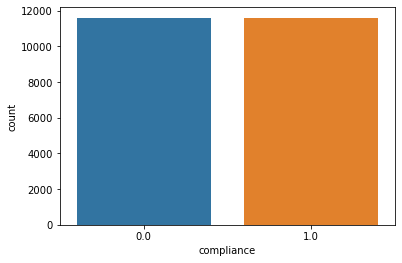

In [41]:
sns.countplot(x='compliance', data=vis_data)

In [45]:
# Обучаем сбалансированную модель
X_train, X_test, y_train, y_test = split_data(vis_data, target='compliance', test_size=0.3)

model = DecisionTreeClassifier(random_state=23)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=23)

In [46]:
y_pred = model.predict(X_test)

balanced_f1 = f1_score(y_test, y_pred)
result = balanced_f1 - f1_score_test


In [47]:
print(result)

0.18272749967696011
